<a href="https://colab.research.google.com/github/ecchost/PCVK_Genap_2021/blob/main/Week%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
import glob

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


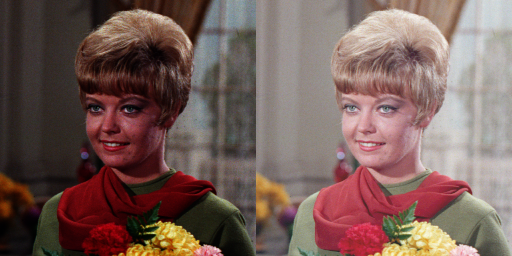

In [7]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/female.tiff')
img_gamma = np.zeros(img.shape, img.dtype)
for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    for z in range(img.shape[2]):
      clip= 255*((img[x,y,z]/255)**(1/gamma))
      img_gamma[x,y,z] = np.clip(clip, 0, 255)

frame = cv.hconcat((img, img_gamma))
cv2_imshow(frame)

 Image Depth Simulation : 
-------------------------------------
Masukkan nilai Image Depth  : 2


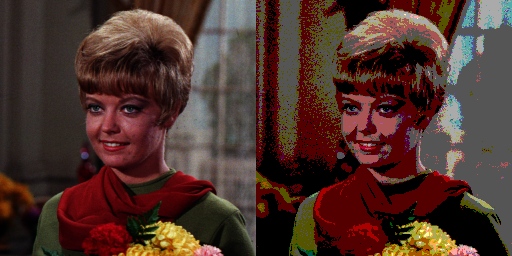

In [13]:
print(' Image Depth Simulation : ')
print('-------------------------------------')
try: 
 depth = int(input('Masukkan nilai Image Depth  : '))
except ValueError:
 print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/female.tiff')
img_depth = np.zeros(img.shape, img.dtype)
accuration = 255/((2**depth)-1)
for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    for z in range(img.shape[2]):
      clip = round((img[x,y,z]/accuration))*accuration
      img_depth[x,y,z] = np.clip(clip, 0, 255)

frame = cv.hconcat((img, img_depth))
cv2_imshow(frame)

PSNR value :  20.18151664466341


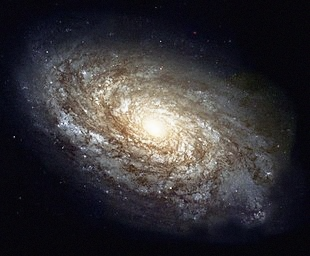

In [16]:
location="/content/drive/MyDrive/noises/*.jpg"
pic=glob.glob(location)
pic.sort()
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

img_number(100) #Input Image Number
def img_number(n): 
    temp = cv.imread(files[0])
    sum_arr = np.zeros(temp.shape).astype(np.float)
    for picture in pic[0:n]:
        img = cv.imread(picture).astype(float)
        sum_arr = sum_arr + img
    denoised_img = sum_arr / n
    output = cv.normalize(denoised_img, None, 0, 255, cv.NORM_MINMAX)
    print('PSNR value : ',PSNR(temp, output))
    cv2_imshow(output)

image input


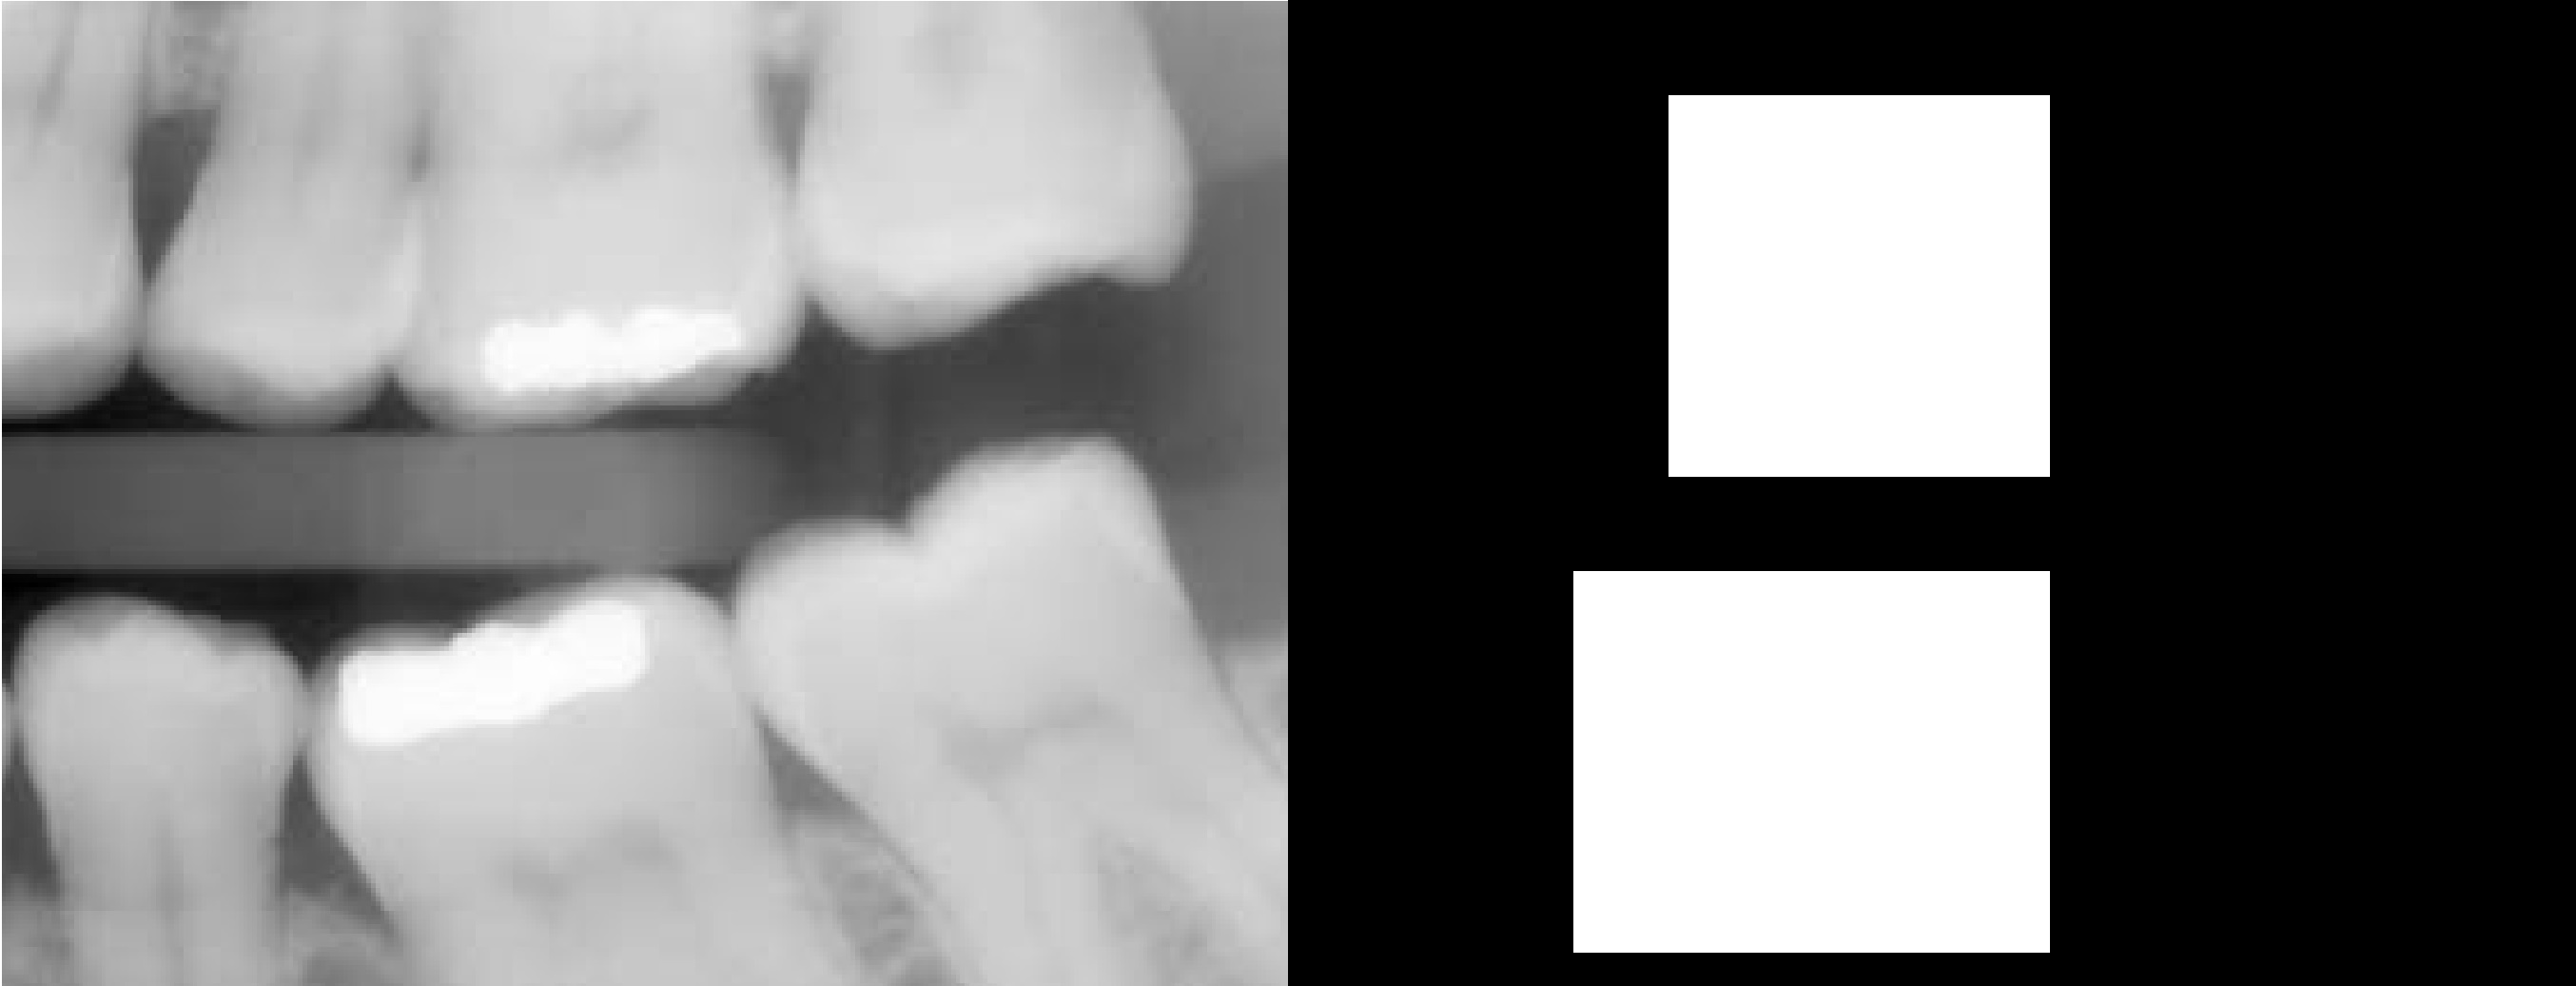

image output:


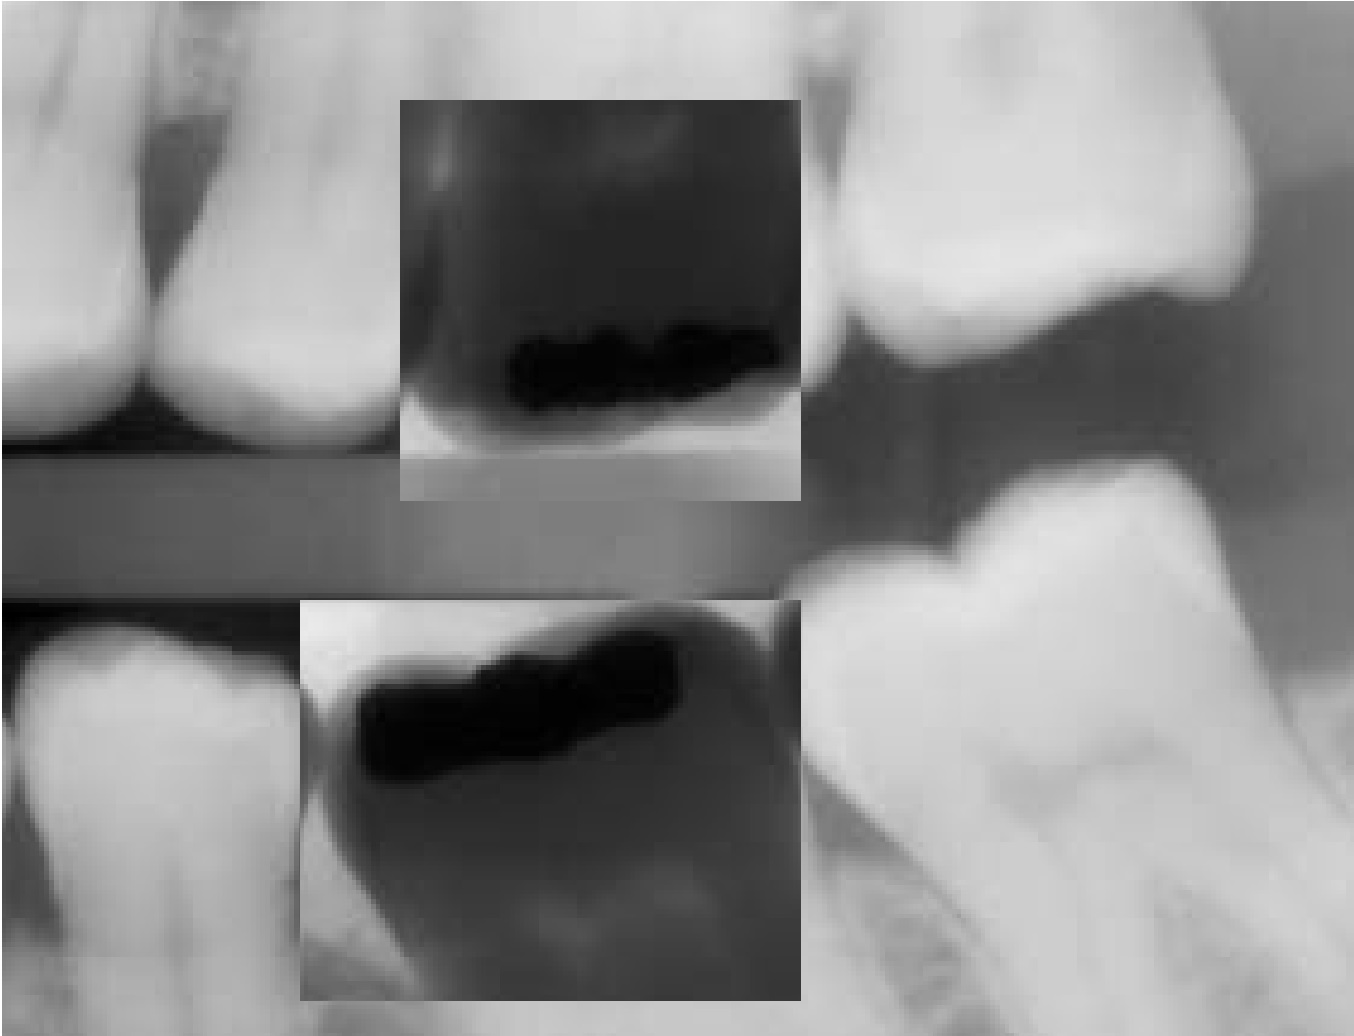

In [19]:
image = cv.imread('/content/drive/MyDrive/teeth.jpg')
black = np.zeros(image.shape, image.dtype)
mask = cv.rectangle(black, (400, 100), (800,500), [255,255,255], cv.FILLED)
mask = cv.rectangle(mask, (300, 600), (800,1000), [255,255,255], cv.FILLED)
print('image input')
frame = cv.hconcat((image, mask))
cv2_imshow(frame)
print('image output:')
# masked_img = cv.bitwise_and(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_or(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_not(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_not(cv.bitwise_and(image, mask))
# cv2_imshow(masked_img)
masked_img = cv.bitwise_xor(image, mask)
cv2_imshow(masked_img)